## Imports

In [1]:
import pandas as pd
import sys

sys.path.insert(0,'../')

from postprocess import *

## Interaction data processing

In [2]:
# For SATORI based interactions
df = pd.read_csv('../Results/Human_Promoter_Analysis_euclidean_v8/Interactions_SATORI/interactions_summary_attnLimit-0.12.txt',sep='\t')

# For FIS based interactions
#df = pd.read_csv('../Results/Human_Promoter_Analysis_euclidean_v8/Interactions_FIS/interactions_summary_attnLimit-0.txt',sep='\t')

### Filter based on interaction and motif hit p-values, and keep the most significant interactions

In [3]:
df = filter_data_on_thresholds(df, motifA_pval_cutoff=0.05, motifB_pval_cutoff=0.05)

In [4]:
df.shape

(601, 12)

### Load the motif description file to annotate the interactions. 
Here we use CISBP (U toronto) motif description file. 

In [5]:
df_annotate = pd.read_csv('../../../Basset_Splicing_IR-iDiffIR/Analysis_For_none_network-typeB_lotus_posThresh-0.60/MEME_analysis/Homo_sapiens_2019_01_14_4_17_pm/TF_Information_all_motifs.txt',sep='\t')

In [6]:
df_annotate.head()

,TF_ID,Family_ID,TSource_ID,Motif_ID,MSource_ID,DBID,TF_Name,TF_Species,TF_Status,Family_Name,...,MSource_Type,MSource_Author,MSource_Year,PMID,MSource_Version,TfSource_Name,TfSource_URL,TfSource_Year,TfSource_Month,TfSource_Day
0,T004843_1.02,F035_1.02,TS19_1.02,M2938_1.02,MS26_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,Transfac,Matys,2006,16381825,2014.2,Ensembl,http://www.ensembl.org/,2011,Oct,26
1,T004843_1.02,F035_1.02,TS19_1.02,M5917_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
2,T004843_1.02,F035_1.02,TS19_1.02,M5918_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
3,T004843_1.02,F035_1.02,TS19_1.02,M5919_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
4,T004843_1.02,F035_1.02,TS19_1.02,M6144_1.02,MS18_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,HocoMoco,Kulakovskiy,2013,23175603,July 2014,Ensembl,http://www.ensembl.org/,2011,Oct,26


### Annotate the interacting motifs

In [7]:
df['TF1'] = df['motif1'].apply(get_annotation, annotation_data=df_annotate, single_TF=True)
df['TF2'] = df['motif2'].apply(get_annotation, annotation_data=df_annotate, single_TF=True)

In [8]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2
0,filter0<-->filter21,20,M1592_1.02,0.000295,M0891_1.02,0.003707,30.0,522.0,160.0,282.0,2.607746e-05,3.502893e-05,SOX3,TLX2
1,filter0<-->filter101,100,M1592_1.02,0.000295,M1110_1.02,0.004396,30.0,30.0,189.0,382.0,3.989510e-08,8.383226e-08,SOX3,HHEX
2,filter0<-->filter130,129,M1592_1.02,0.000295,M0891_1.02,0.040161,108.0,30.0,223.0,376.0,3.366370e-09,8.815468e-09,SOX3,TLX2
3,filter0<-->filter133,132,M1592_1.02,0.000295,M0609_1.02,0.004863,120.0,312.0,231.0,334.0,6.041287e-25,3.089641e-23,SOX3,DNMT1
4,filter0<-->filter161,160,M1592_1.02,0.000295,M4459_1.02,0.022421,90.0,384.0,191.0,243.0,7.534641e-08,1.499697e-07,SOX3,EGR1


In [9]:
df['TF_Interaction'] = df.apply(lambda x: x['TF1']+r'$\longleftrightarrow$'+x['TF2'], axis=1)

### Drop same motif interactions

In [10]:
df = df[df['TF1']!=df['TF2']]

In [11]:
df.shape

(523, 15)

In [12]:
df = df.reset_index(drop=True)

### Fix redundant interaction pairs

In [13]:
df = process_for_redundant_interactions(df, intr_type='TF')

In [14]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction
0,filter0<-->filter21,20,M1592_1.02,0.000295,M0891_1.02,0.003707,30.0,522.0,160.0,282.0,2.607746e-05,3.502893e-05,SOX3,TLX2,SOX3$\longleftrightarrow$TLX2
1,filter0<-->filter101,100,M1592_1.02,0.000295,M1110_1.02,0.004396,30.0,30.0,189.0,382.0,3.989510e-08,8.383226e-08,SOX3,HHEX,SOX3$\longleftrightarrow$HHEX
2,filter0<-->filter130,129,M1592_1.02,0.000295,M0891_1.02,0.040161,108.0,30.0,223.0,376.0,3.366370e-09,8.815468e-09,SOX3,TLX2,SOX3$\longleftrightarrow$TLX2
3,filter0<-->filter133,132,M1592_1.02,0.000295,M0609_1.02,0.004863,120.0,312.0,231.0,334.0,6.041287e-25,3.089641e-23,SOX3,DNMT1,SOX3$\longleftrightarrow$DNMT1
4,filter0<-->filter161,160,M1592_1.02,0.000295,M4459_1.02,0.022421,90.0,384.0,191.0,243.0,7.534641e-08,1.499697e-07,SOX3,EGR1,SOX3$\longleftrightarrow$EGR1


In [15]:
df.shape

(523, 15)

## Most Frequent TF Family Interactions

In [16]:
tf_family_dict = {}
for TF in df_annotate['TF_Name']:
    tf_family_dict[TF] = df_annotate[df_annotate['TF_Name']==TF]['Family_Name'].iloc[0]
df['TF1_Family'] = df['TF1'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')
df['TF2_Family'] = df['TF2'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')

In [17]:
df['Family_Interaction'] = df.apply(lambda x: x['TF1_Family']+r'$\longleftrightarrow$'+x['TF2_Family'],axis=1)

In [18]:
df = process_for_redundant_interactions(df, intr_type='Family')

In [19]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction,TF1_Family,TF2_Family,Family_Interaction
0,filter0<-->filter21,20,M1592_1.02,0.000295,M0891_1.02,0.003707,30.0,522.0,160.0,282.0,2.607746e-05,3.502893e-05,SOX3,TLX2,SOX3$\longleftrightarrow$TLX2,Sox,Homeodomain,Sox$\longleftrightarrow$Homeodomain
1,filter0<-->filter101,100,M1592_1.02,0.000295,M1110_1.02,0.004396,30.0,30.0,189.0,382.0,3.989510e-08,8.383226e-08,SOX3,HHEX,SOX3$\longleftrightarrow$HHEX,Sox,Homeodomain,Sox$\longleftrightarrow$Homeodomain
2,filter0<-->filter130,129,M1592_1.02,0.000295,M0891_1.02,0.040161,108.0,30.0,223.0,376.0,3.366370e-09,8.815468e-09,SOX3,TLX2,SOX3$\longleftrightarrow$TLX2,Sox,Homeodomain,Sox$\longleftrightarrow$Homeodomain
3,filter0<-->filter133,132,M1592_1.02,0.000295,M0609_1.02,0.004863,120.0,312.0,231.0,334.0,6.041287e-25,3.089641e-23,SOX3,DNMT1,SOX3$\longleftrightarrow$DNMT1,Sox,CxxC,Sox$\longleftrightarrow$CxxC
4,filter0<-->filter161,160,M1592_1.02,0.000295,M4459_1.02,0.022421,90.0,384.0,191.0,243.0,7.534641e-08,1.499697e-07,SOX3,EGR1,SOX3$\longleftrightarrow$EGR1,Sox,C2H2 ZF,Sox$\longleftrightarrow$C2H2 ZF


### Distribution of individual TF or TF family interactions

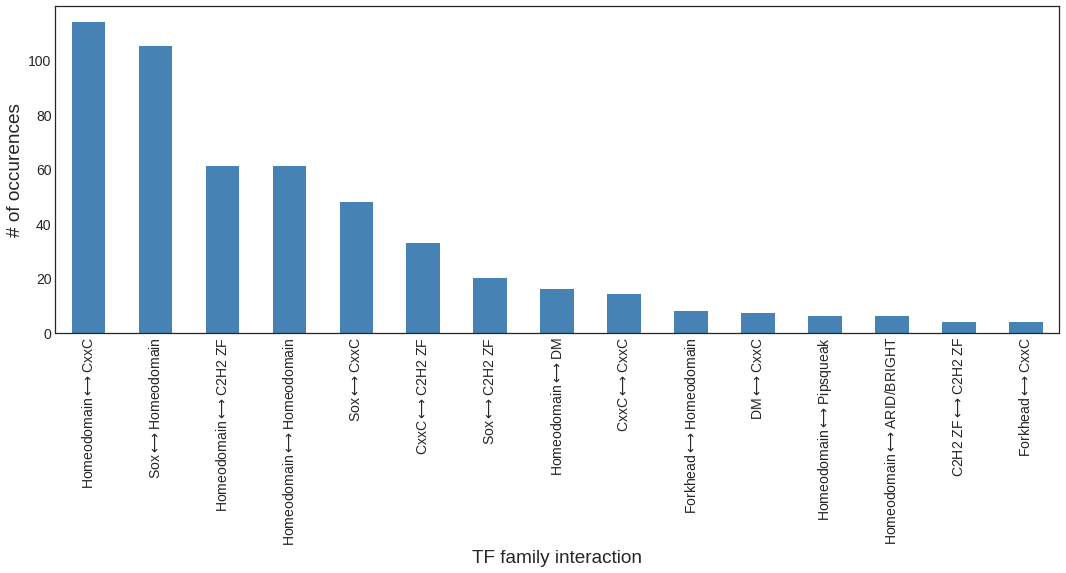

In [20]:
plot_frequent_interactions(df, intr_level='Family_Interaction', first_n=15)

### Plot interaction distance distribution

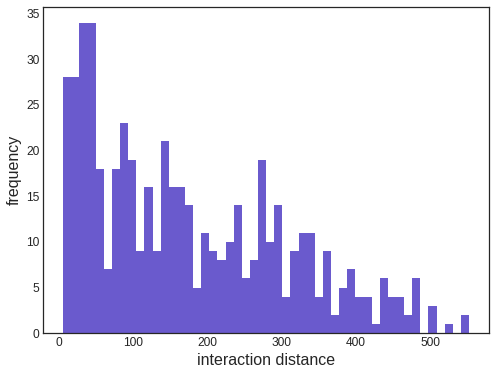

In [21]:
plot_interaction_distance_distribution(df, nbins=50, fig_size=(8,6))

### Most frequent interactions and their respective interaction distances

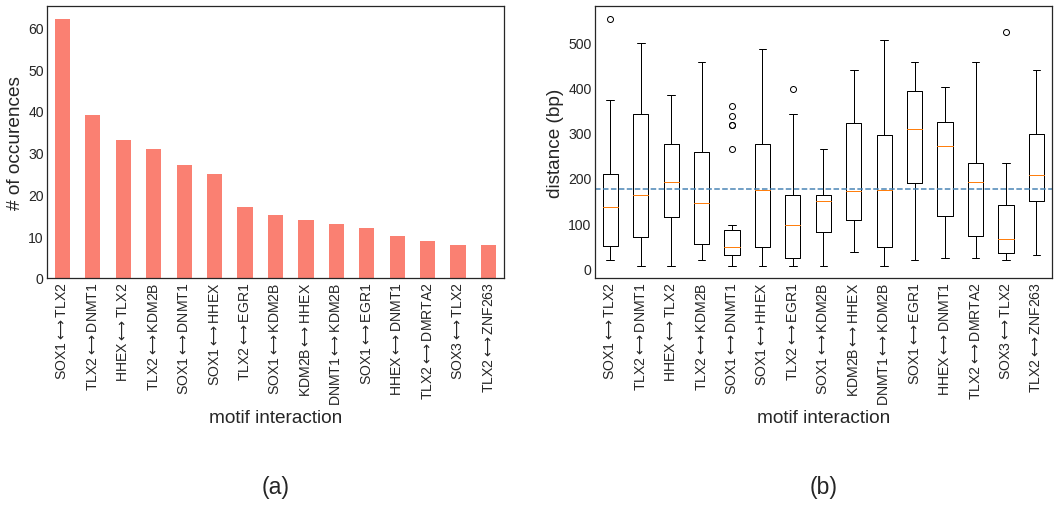

In [22]:
plot_interactions_and_distances_boxplot(df, first_n=15, sort_distances=False, add_sub_caption=True, show_mean_dist=True)

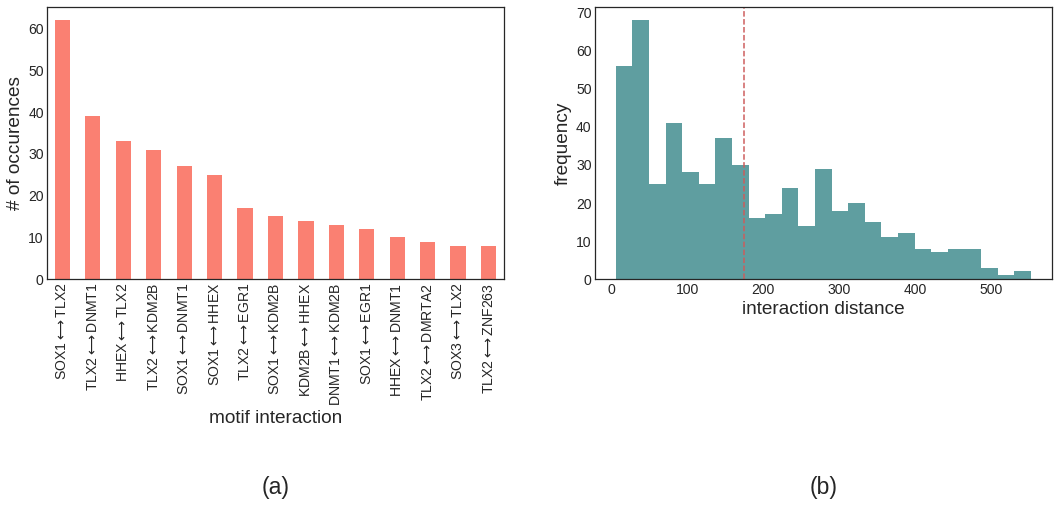

In [23]:
plot_interactions_and_distances_histogram(df, first_n=15, dist_nbins=25, add_sub_caption=True, show_mean_dist=True)

### Annotate Interactions using TRRUSTv2 (and other sources)

#### Read TRRUSTv2 interactions

In [24]:
#dictionaries with genes/TFs as keys and [target_gene/TF, role, PUBMID ID] as value
with open('/s/jawar/h/nobackup/fahad/Human_Chromatin/TRUSTv2/human_co-regulate_dict.pckl','rb') as f:
    human_dict = pickle.load(f)

In [25]:
df['Interaction_in_TRUSTv2'] = df['TF_Interaction'].apply(db_annotate_interaction, intr_dict = human_dict)

In [26]:
df_resTRUSTv2 = df[df['Interaction_in_TRUSTv2']==1]

In [27]:
df_resTRUSTv2[['TF_Interaction','TF1_Family','TF2_Family','adjusted_pval']].sort_values(by='adjusted_pval').drop_duplicates('TF_Interaction')

,TF_Interaction,TF1_Family,TF2_Family,adjusted_pval
463,DNMT1$\longleftrightarrow$LCOR,CxxC,Pipsqueak,8.356110e-29
245,DNMT1$\longleftrightarrow$EGR1,C2H2 ZF,CxxC,3.369591e-24
250,EGR1$\longleftrightarrow$LCOR,C2H2 ZF,Pipsqueak,1.853594e-09
235,EGR1$\longleftrightarrow$FOXK2,C2H2 ZF,Forkhead,6.358401e-05
